In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

for nr in [1,2,3,4,5,6]:
    filepath = f'part{nr}.csv'
    print(f'Processing {filepath}')
    rows = []
    with open(filepath, 'r') as f:
        for line in f:
            row = line.strip().replace('&nbsp;','').replace('"','').split(',')
            row = [c for c in row if c != '']
            rows.append(row)
            
    # display(rows)

    slides = {}
    current_slide = rows[0][0]
    slides[current_slide] = []
    for i, row in enumerate(rows):
        if len(row) == 0:
            if len(rows) == i+1:
                break
            current_slide = rows[i+1][0]
            slides[current_slide] = []
            continue
        if row[0] == 'Conclusion':
            continue
        slides[current_slide].append(row)

    # display(slides)

    dfs = []
    for slide in slides:
        slide_rows = slides[slide]
        df = pd.DataFrame(slide_rows[1:], columns=["biopsy", *slide_rows[0][1:]])
        # Transpose the dataframe
        df = df.T
        # Set the first row as the header
        df.columns = df.iloc[0]
        # Drop the first row
        df = df[1:]
        df['slide'] = slide
        df['biopsy_nr'] = df.index
        # Remove "P53 Biopsy" from biopsy_nr
        df['biopsy_nr'] = df['biopsy_nr'].str.replace('P53 Biopsy ', '')
        df.index = df['slide'] + '_b' + df['biopsy_nr']
        dfs.append(df)

    df = pd.concat(dfs)

    df = df.drop(columns=['slide', 'biopsy_nr'])
    # Drop columns NeilTest and test
    drop_columns = ['NeilTest', 'test', 'lverheijen']
    for column in drop_columns:
        if column in df.columns:
            df = df.drop(columns=[column])
    # If a column only contains "Unanswered", drop it
    for column in df.columns:
        if df[column].nunique() == 1 and df[column].iloc[0] == 'Unanswered':
            df = df.drop(columns=[column])
    for column in df.columns:
        # If a column contains "Unanswered", give warning
        if 'Unanswered' in df[column].values or "N/A" in df[column].values:
            print(f'WARNING: Unanswered in column {column}')
    df = df.replace('N/A', 'Unanswered')
    # Count number of ratings per row (excluding "Unanswered" values if present)
    def zero_if_none(x):
        return 0 if x == None else x
    df['total_ratings'] = df.apply(lambda x: x.value_counts().sum() - zero_if_none(x.value_counts().get('Unanswered')), axis=1)
    # Make column with count of most frequent value
    df['label_count'] = df.apply(lambda x: x.value_counts().max(), axis=1)
    # Make column with most frequent value
    df['label'] = df.mode(axis=1).iloc[:,0]

    # Show distribution of label count column in table
    print(df['total_ratings'].value_counts())
    print(df['label_count'].value_counts())

    display(df)

    # Save the dataframe to a csv file
    df.to_csv(f'part{nr}_transposed.csv')

C:\Users\321lu\AppData\Local\Temp\ipykernel_32984\429998605.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


Processing part1.csv
total_ratings
4    99
Name: count, dtype: int64
label_count
4    67
3    22
2    10
Name: count, dtype: int64


biopsy,hhalfwerk,slmeijer,mjvanderwel,loudijk,total_ratings,label_count,label
RL-0027-I-P53_b1,WT,WT,WT,WT,4,4,WT
RL-0027-I-P53_b2,WT,WT,WT,WT,4,4,WT
RL-0027-I-P53_b3,WT,WT,WT,WT,4,4,WT
RL-0027-I-P53_b4,Double clones,Double clones,Overexpression,Double clones,4,3,Double clones
RL-0036-III-P53_b1,Overexpression,Overexpression,Overexpression,Overexpression,4,4,Overexpression
...,...,...,...,...,...,...,...
RL-0013-1-II-P53_b1,Null,Null,Double clones,Null,4,3,Null
RL-0013-1-II-P53_b2,WT,WT,WT,WT,4,4,WT
RL-0013-1-II-P53_b3,WT,WT,WT,WT,4,4,WT
RL-0013-1-II-P53_b4,WT,WT,WT,WT,4,4,WT


Processing part2.csv
total_ratings
4    100
Name: count, dtype: int64
label_count
4    72
3    19
2     9
Name: count, dtype: int64


biopsy,hhalfwerk,slmeijer,mjvanderwel,loudijk,total_ratings,label_count,label
RL-0244-I-P53_b1,WT,WT,Overexpression,WT,4,3,WT
RL-0244-I-P53_b2,Overexpression,Overexpression,Overexpression,Overexpression,4,4,Overexpression
RL-0244-I-P53_b3,WT,WT,Overexpression,WT,4,3,WT
RL-0252-I-P53_b1,WT,WT,WT,WT,4,4,WT
RL-0252-I-P53_b2,Overexpression,WT,Overexpression,WT,4,2,Overexpression
...,...,...,...,...,...,...,...
RL-0426-III-P53_b2,Null,Null,WT,Null,4,3,Null
RL-0426-III-P53_b3,Overexpression,WT,Overexpression,Overexpression,4,3,Overexpression
RL-0426-III-P53_b4,Overexpression,Overexpression,Overexpression,WT,4,3,Overexpression
RL-0345-P53-1_b1,Null,Null,Null,Null,4,4,Null


Processing part3.csv
total_ratings
4    112
Name: count, dtype: int64
label_count
4    94
3    12
2     6
Name: count, dtype: int64


biopsy,hhalfwerk,slmeijer,aooms,cvanderpost,total_ratings,label_count,label
RL-0430-I-P53_b1,Double clones,Double clones,Double clones,Double clones,4,4,Double clones
RL-0430-I-P53_b2,WT,WT,WT,WT,4,4,WT
RL-0430-I-P53_b3,WT,WT,WT,WT,4,4,WT
RL-0430-I-P53_b4,Double clones,Double clones,Double clones,Double clones,4,4,Double clones
RL-0430-I-P53_b5,Overexpression,Overexpression,Overexpression,Overexpression,4,4,Overexpression
...,...,...,...,...,...,...,...
RL-0547-III-P53_b2,Overexpression,Overexpression,WT,Overexpression,4,3,Overexpression
RL-0547-III-P53_b3,Overexpression,Overexpression,Overexpression,Overexpression,4,4,Overexpression
RL-0547-III-P53_b4,Overexpression,Overexpression,Overexpression,Overexpression,4,4,Overexpression
RL-0584-II-P53_b1,WT,WT,WT,WT,4,4,WT


Processing part4.csv
total_ratings
4    87
3    14
Name: count, dtype: int64
label_count
4    55
3    32
2    13
1     1
Name: count, dtype: int64


C:\Users\321lu\AppData\Local\Temp\ipykernel_32984\429998605.py:74: UserWarning: Unable to sort modes: '<' not supported between instances of 'int' and 'str'
  df['label'] = df.mode(axis=1).iloc[:,0]


biopsy,hhalfwerk,slmeijer,aooms,cvanderpost,total_ratings,label_count,label
RL-0590-I-P53_b1,WT,WT,WT,WT,4,4,WT
RL-0590-I-P53_b2,WT,WT,WT,WT,4,4,WT
RL-0590-I-P53_b3,Overexpression,Overexpression,Overexpression,Overexpression,4,4,Overexpression
RL-0595-I-P53_b1,WT,WT,WT,WT,4,4,WT
RL-0595-I-P53_b2,Overexpression,Overexpression,WT,Overexpression,4,3,Overexpression
...,...,...,...,...,...,...,...
RL-0531-II_III-P53_b3,WT,Null,Null,Null,4,3,Null
RL-0531-II_III-P53_b4,WT,WT,WT,WT,4,4,WT
RL-0531-II_III-P53_b5,WT,WT,WT,WT,4,4,WT
RL-0531-II_III-P53_b6,WT,WT,WT,WT,4,4,WT


Processing part5.csv
total_ratings
4    126
Name: count, dtype: int64
label_count
4    100
3     16
2     10
Name: count, dtype: int64


biopsy,hhalfwerk,laabrosens,slmeijer,fjtencate,total_ratings,label_count,label
RL-0753-II-P53_b1,WT,WT,WT,WT,4,4,WT
RL-0753-II-P53_b2,WT,WT,WT,WT,4,4,WT
RL-0753-II-P53_b3,WT,WT,WT,WT,4,4,WT
RL-0753-II-P53_b4,Overexpression,Overexpression,Overexpression,Overexpression,4,4,Overexpression
RL-0763-II-P53_b1,WT,WT,WT,WT,4,4,WT
...,...,...,...,...,...,...,...
RL-0603-II_III_IV-P53_b11,WT,WT,WT,WT,4,4,WT
RL-0603-II_III_IV-P53_b12,WT,WT,WT,WT,4,4,WT
RL-0429-I_II_P53_b1,WT,WT,WT,WT,4,4,WT
RL-0429-I_II_P53_b2,WT,WT,WT,WT,4,4,WT


Processing part6.csv
total_ratings
4    114
Name: count, dtype: int64
label_count
4    85
3    25
2     4
Name: count, dtype: int64


biopsy,hhalfwerk,laabrosens,slmeijer,fjtencate,total_ratings,label_count,label
RL-0849-II-P53_b1,Null,Null,Null,Null,4,4,Null
RL-0849-II-P53_b2,Double clones,Double clones,Double clones,Double clones,4,4,Double clones
RL-0849-II-P53_b3,Null,Null,Null,Null,4,4,Null
RL-0866-I-P53_b1,WT,WT,WT,WT,4,4,WT
RL-0866-I-P53_b2,WT,WT,WT,WT,4,4,WT
...,...,...,...,...,...,...,...
RL-0580-I_II_III-P53_b4,Double clones,Double clones,Double clones,Double clones,4,4,Double clones
RL-0580-I_II_III-P53_b5,WT,Overexpression,WT,WT,4,3,WT
RL-0580-I_II_III-P53_b6,Null,Null,Null,Null,4,4,Null
RL-0580-I_II_III-P53_b7,Overexpression,Overexpression,Overexpression,Overexpression,4,4,Overexpression


Unique slides: 163
Total biopsies: 652
Biopsies with 100% concordance: 484
Biopsies with lower than 100% concordance: 168
Biopsies with 75% concordance: 115
Biopsies with lower than 75% concordance: 53



,label,total_ratings,label_count,hhalfwerk,slmeijer,mjvanderwel,loudijk,aooms,cvanderpost,laabrosens,fjtencate,concordance %
RL-0027-I-P53_b1,WT,4,4,WT,WT,WT,WT,NaN,NaN,NaN,NaN,100
RL-0027-I-P53_b2,WT,4,4,WT,WT,WT,WT,NaN,NaN,NaN,NaN,100
RL-0027-I-P53_b3,WT,4,4,WT,WT,WT,WT,NaN,NaN,NaN,NaN,100
RL-0027-I-P53_b4,Double clones,4,3,Double clones,Double clones,Overexpression,Double clones,NaN,NaN,NaN,NaN,75
RL-0036-III-P53_b1,Overexpression,4,4,Overexpression,Overexpression,Overexpression,Overexpression,NaN,NaN,NaN,NaN,100
...,...,...,...,...,...,...,...,...,...,...,...,...
RL-0580-I_II_III-P53_b4,Double clones,4,4,Double clones,Double clones,NaN,NaN,NaN,NaN,Double clones,Double clones,100
RL-0580-I_II_III-P53_b5,WT,4,3,WT,WT,NaN,NaN,NaN,NaN,Overexpression,WT,75
RL-0580-I_II_III-P53_b6,Null,4,4,Null,Null,NaN,NaN,NaN,NaN,Null,Null,100
RL-0580-I_II_III-P53_b7,Overexpression,4,4,Overexpression,Overexpression,NaN,NaN,NaN,NaN,Overexpression,Overexpression,100


label
WT                427
Overexpression     96
Double clones      40
Null               36
Name: count, dtype: int64

hhalfwerk
0.963
slmeijer
0.947
mjvanderwel
0.872
loudijk
0.989
aooms
0.938
cvanderpost
0.953
laabrosens
0.951
fjtencate
0.934
concordance %
0.000


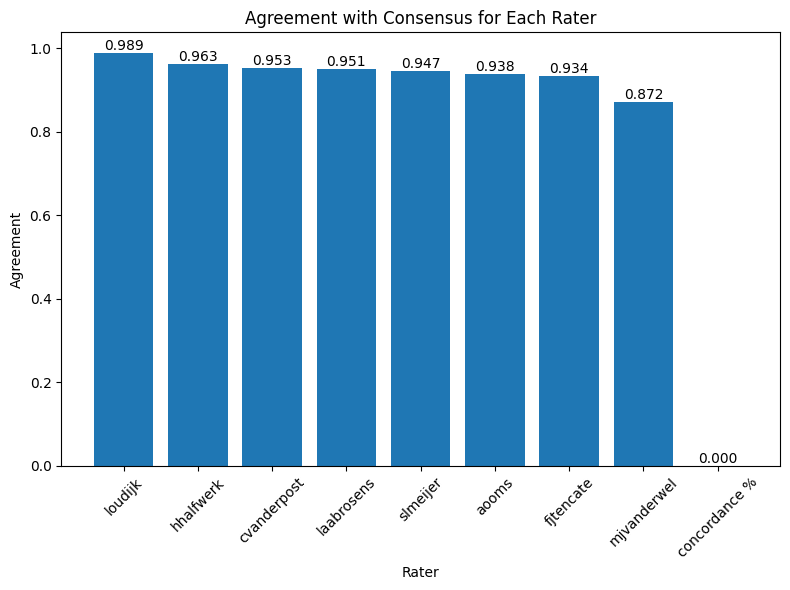


hhalfwerk and slmeijer agreed 0.857 of the time


In [57]:
dfs = []
for nr in [1,2,3,4,5,6]:
    df = pd.read_csv(f'part{nr}_transposed.csv', index_col=0)
    dfs.append(df)
df = pd.concat(dfs)
# Move label column to the front
df = df[['label', 'total_ratings', 'label_count']+[c for c in df.columns if c not in ['label', 'total_ratings', 'label_count']]]


df["slide"] = df.index.str.split("_").str[0]
# Print the number of unique slides
print("Unique slides:", df["slide"].nunique())
df.drop(columns=["slide"], inplace=True)

# How many rows have label_count < 3?
print("Total biopsies:", len(df))
df['concordance %'] = df['label_count'] / df['total_ratings'] * 100
df['concordance %'] = df['concordance %'].astype(int)
print("Biopsies with 100% concordance:", (df['concordance %'] == 100).sum())
print("Biopsies with lower than 100% concordance:", (df['concordance %'] < 100).sum())
print("Biopsies with 75% concordance:", (df['concordance %'] == 75).sum())
print("Biopsies with lower than 75% concordance:", (df['concordance %'] < 75).sum())

print()

# Drop rows with label_count < 3
df_low_concordance = df[df['label_count'] < 3]
# Save df_low_concordance to a csv file
df_low_concordance.to_csv('low_concordance.csv')
df_consensus = df[df['label_count'] >= 3]

display(df_consensus)

# Show distribution of label column in table
print(df_consensus['label'].value_counts())

print()

# For each column, show with what percentage the value is equal to the label
agreements = {}
for column in df_consensus.columns:
    if column in ['label', 'label_count', 'total_ratings']:
        continue
    print(column)
    # Don't count NaN values in the column
    selection = df_consensus[column].notnull()
    agreement = (df_consensus[column][selection] == df_consensus['label'][selection]).mean()
    print(f"{agreement:.3f}")

    agreements[column] = agreement

import matplotlib.pyplot as plt

# Sort the agreements
agreements = {k: v for k, v in sorted(agreements.items(), key=lambda item: item[1], reverse=True)}

# Plot the agreements
plt.figure(figsize=(8, 6))  # Adjust the figure size as desired
plt.bar(agreements.keys(), agreements.values())
plt.xlabel('Rater')
plt.ylabel('Agreement')
plt.title('Agreement with Consensus for Each Rater')
plt.xticks(rotation=45)  # Rotate the x-axis labels if needed
plt.tight_layout()  # Adjust the spacing
# Display the number on top of each bar
for i, v in enumerate(agreements.values()):
    plt.text(i, v, f'{v:.3f}', ha='center', va='bottom')

plt.show()

print()
# hhalfwerk and slmeijer agreed ?% of the time
hh_sl_agreement = (df['hhalfwerk'] == df['slmeijer']).mean()
print(f"hhalfwerk and slmeijer agreed {hh_sl_agreement:.3f} of the time")

# Visualize the predictions for each biopsy

,label0,label1,label2,label3
RL-0042-III-P53_1_b1,0,0,0,1
RL-0048-I-P53_b2,0,0,0,1
RL-0058-III-P53_b2,0,0,0,1
RL-0130-IV-P53_b1,0,0,0,1
RL-0130-IV-P53_b4,0,0,0,1
...,...,...,...,...
RL-0094-III-P53_1_b1,2,3,3,3
RL-0522-I-P53_b1,2,3,3,3
RL-0547-III-P53_b1,2,3,3,3
RL-0894-I-P53_b1,2,3,3,3


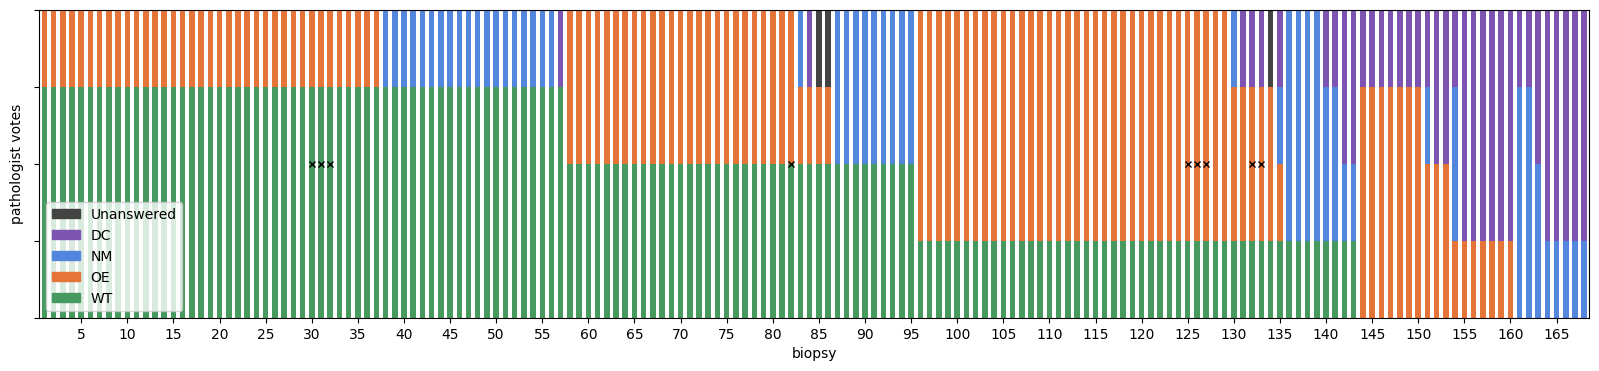

In [73]:
color_dict = {
    "r": '#DA4C4C', # Red
    "o": '#E57439', # Orange
    "y": '#EDB732', # Yellow
    "g": '#479A5F', # Green
    "lb": '#5BC5DB', # Light blue
    "b": '#5387DD', # Blue
    "p": '#7D54B2', # Purple
    "pi": '#E87B9F', # Pink
#  '#229487', # Dark green/Turquoise
#  '#C565C7', # Lilac
    "r_p": '#E89393', # Pale red
    "o_p": '#EFAB88', # Pale orange
    "y_p": '#F4D384', # Pale yellow
    "g_p": '#90C29F', # Pale green
    "lb_p":'#9CDCE9', # Pale light blue
    "b_p": '#98B7EA', # Pale blue
    "p_p": "#B198D0", # Pale purple
}
colors = list(color_dict.values())

label_mapping = {
    'WT': 0,
    'Overexpression': 1,
    'Null': 2,
    'Double clones': 3,
    'None': 4,
    'Unanswered': 4
}


label_data = df.copy()

# Only consider biopsies below 100% consensus
label_data = label_data[label_data['concordance %'] < 100]

# Drop columns that are not labels
drop_columns = ['label', 'label_count', 'total_ratings', 'concordance %']
for column in drop_columns:
    if column in label_data.columns:
        label_data = label_data.drop(columns=[column])
# For each row, make four new columns each for an anonymized label
for i, row in label_data.iterrows():
    row_labels = row.values
    for j in range(4):
        label_data.at[i, f'label{j}'] = 'None'
    j = 0
    labels = []
    for label in row_labels:
        # If label is NaN, skip
        if pd.isna(label):
            continue
        labels.append(label_mapping[label])
    # Sort the labels
    labels.sort()
    for label in labels:
        label_data.at[i, f'label{j}'] = label
        j += 1
# Drop the original label columns
label_data = label_data.drop(columns=label_data.columns[:-4])
# Sort rows based on how many 0-labels they have in all four label columns
label_data = label_data.sort_values(by=['label0', 'label1', 'label2', 'label3'])
display(label_data)


fig, ax = plt.subplots(1, 1, figsize=(20,6))

n_labels = 5
counts = np.zeros((len(label_data), n_labels))
# For every case
for i, row in enumerate(label_data.iterrows()):
    # Get the labels
    labels = row[1]
    # For every label
    for j, label in enumerate(labels):
        # Increment the count
        counts[i, label] += 1
# Create a DataFrame
counts = pd.DataFrame(counts, columns=range(n_labels))
color = [color_dict['g'], color_dict['o'], color_dict['b'], color_dict['p'], '#444444']
labels = ['WT', 'OE', 'NM', 'DC', 'Unanswered']
ax = counts.plot(kind='bar', stacked=True, width=.6, color=color, alpha=1, ax=ax, figsize=(20,4))

# Add legend with the labels
plt.legend(handles=[
    plt.Rectangle((0,0),1,1, color=color[i], label=labels[i]) for i in reversed(range(n_labels))],
    loc='lower left')

# ax.set_xticks(np.arange(len(counts)), np.arange(1, len(counts)+1), rotation=0)
# Skip every even x-tick
ax.set_xticks(np.arange(4, len(counts))[::5], np.arange(5, len(counts)+1)[::5], rotation=0)

ax.set_xlabel('biopsy')
ax.set_ylabel('pathologist votes')
ax.set_ylim(0, max(counts.sum(axis=1)))

# Remove y labels and set y ticks to integers
ax.set_yticklabels([])
ax.yaxis.set_major_locator(plt.MaxNLocator(integer=True))

# If index of label_data has "sme" in it, draw a little black x in the middle of the bar
for i, row in enumerate(label_data.iterrows()):
    if 'sme' in row[0]:
        ax.plot(i, counts.iloc[i].sum()/2, 'xk', markersize=5)

plt.show()


# ----

C:\Users\321lu\AppData\Local\Temp\ipykernel_32984\3094861741.py:7: UserWarning: Unable to sort modes: '<' not supported between instances of 'str' and 'int'
  df_random['label'] = df_random.mode(axis=1).iloc[:,0]


,total_ratings,label_count,hhalfwerk,mjvanderwel,loudijk,aooms,cvanderpost,laabrosens,fjtencate,random,label
RL-0027-I-P53_b1,4,4,WT,WT,WT,NaN,NaN,NaN,NaN,WT,WT
RL-0027-I-P53_b2,4,3,WT,WT,WT,NaN,NaN,NaN,NaN,Null,WT
RL-0027-I-P53_b3,4,3,WT,WT,WT,NaN,NaN,NaN,NaN,Null,WT
RL-0027-I-P53_b4,4,2,Double clones,Overexpression,Double clones,NaN,NaN,NaN,NaN,WT,Double clones
RL-0036-III-P53_b1,4,4,Overexpression,Overexpression,Overexpression,NaN,NaN,NaN,NaN,Overexpression,Overexpression
...,...,...,...,...,...,...,...,...,...,...,...
RL-0580-I_II_III-P53_b4,4,3,Double clones,NaN,NaN,NaN,NaN,Double clones,Double clones,Null,Double clones
RL-0580-I_II_III-P53_b5,4,3,WT,NaN,NaN,NaN,NaN,Overexpression,WT,WT,WT
RL-0580-I_II_III-P53_b6,4,4,Null,NaN,NaN,NaN,NaN,Null,Null,Null,Null
RL-0580-I_II_III-P53_b7,4,4,Overexpression,NaN,NaN,NaN,NaN,Overexpression,Overexpression,Overexpression,Overexpression


533


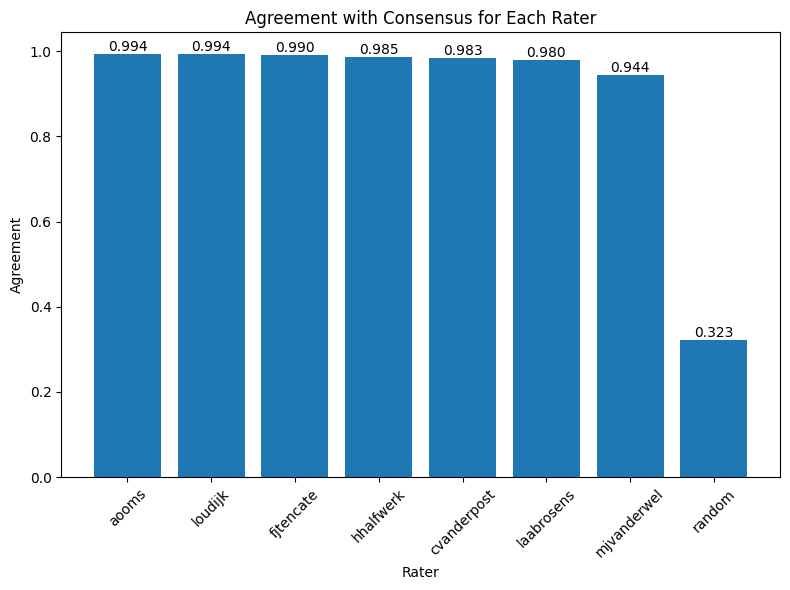

In [29]:
# Test how much agreement a random rater would have with the consensus
df_random = df.copy()
df_random['random'] = np.random.choice(['WT','Overexpression','Null','Double clones'], len(df))
df_random.drop(['slmeijer', 'label'], axis=1, inplace=True) # pick a rater who graded all biopsies to replace
# Calculate new consensus labels
df_random['label_count'] = df_random.apply(lambda x: x.value_counts().max(), axis=1)
df_random['label'] = df_random.mode(axis=1).iloc[:,0]
display(df_random)
df_random_consensus = df_random[df_random['label_count'] >= 3]
print(len(df_random_consensus))
random_agreements = {}
for column in df_random.columns:
    if column in ['label', 'label_count', 'total_ratings']:
        continue
    # Don't count NaN values in the column
    selection = df_random_consensus[column].notnull()
    agreement = (df_random_consensus[column][selection] == df_random_consensus['label'][selection]).mean()
    random_agreements[column] = agreement
random_agreements = {k: v for k, v in sorted(random_agreements.items(), key=lambda item: item[1], reverse=True)}

# Plot the agreements
plt.figure(figsize=(8, 6))  # Adjust the figure size as desired
plt.bar(random_agreements.keys(), random_agreements.values())
plt.xlabel('Rater')
plt.ylabel('Agreement')
plt.title('Agreement with Consensus for Each Rater')
plt.xticks(rotation=45)  # Rotate the x-axis labels if needed
plt.tight_layout()  # Adjust the spacing
# Display the number on top of each bar
for i, v in enumerate(random_agreements.values()):
    plt.text(i, v, f'{v:.3f}', ha='center', va='bottom')

plt.show()

In [60]:
# Make nice csv file for the pathologists with columns "case_nr", "biopsy_nr", "total_ratings", "label", "concordance %"
# Include all biopsies, not just the ones with consensus
df_all = pd.concat([df_consensus, df_low_concordance])
df_all['case_nr'] = df_all.index.str.split("_b").str[0]
df_all['biopsy_nr'] = df_all.index.str.split("_b").str[1]
df_all['concordance %'] = df_all['label_count'] / df_all['total_ratings'] * 100
df_all['concordance %'] = df_all['concordance %'].astype(int)
df_all = df_all[['case_nr', 'biopsy_nr', 'total_ratings', 'label', 'concordance %']]
display(df_all)
df_all.to_csv('pathxl_study_biopsies.csv', index=False)

,case_nr,biopsy_nr,total_ratings,label,concordance %
RL-0027-I-P53_b1,RL-0027-I-P53,1,4,WT,100
RL-0027-I-P53_b2,RL-0027-I-P53,2,4,WT,100
RL-0027-I-P53_b3,RL-0027-I-P53,3,4,WT,100
RL-0027-I-P53_b4,RL-0027-I-P53,4,4,Double clones,75
RL-0036-III-P53_b1,RL-0036-III-P53,1,4,Overexpression,100
...,...,...,...,...,...
RL-0603-II_III_IV-P53_b2,RL-0603-II_III_IV-P53,2,4,Double clones,50
RL-0895-I-P53_b1,RL-0895-I-P53,1,4,Null,50
RL934_I_p53_sme_b4,RL934_I_p53_sme,4,4,Overexpression,50
RL960_II_p53_sme_b1,RL960_II_p53_sme,1,4,Overexpression,50


In [75]:
# Calculate slide-level labels
slide_labels = {}
df_all_code = df_all.copy()
label_str_to_int = {'WT':0, 'Overexpression':1, 'Null':2, 'Double clones':3}
label_int_to_str = {v: k for k, v in label_str_to_int.items()}
label_int_to_short = {0: 'WT', 1: 'OE', 2: 'NM', 3: 'DC'}
df_all_code['label_code'] = df_all_code['label'].replace(label_str_to_int)

def calc_slide_level_label(biopsy_labels, biopsy_concordance):
    # If there is only one biopsy, return that label with its concordance
    if len(biopsy_labels) == 1:
        return biopsy_labels[0], biopsy_concordance[0]
    # If there are multiple biopsies, return the highest label, or return 3 if there is both 1 and 2
    if 1 in biopsy_labels and 2 in biopsy_labels:
        concordance_1 = max([c for i, c in enumerate(biopsy_concordance) if biopsy_labels[i] == 1])
        concordance_2 = max([c for i, c in enumerate(biopsy_concordance) if biopsy_labels[i] == 2])
        return 3, min(concordance_1, concordance_2)
    max_label = max(biopsy_labels)
    if max_label == 0:
        concordance = min([c for i, c in enumerate(biopsy_concordance) if biopsy_labels[i] == 0])
    else:
        concordance = max([c for i, c in enumerate(biopsy_concordance) if biopsy_labels[i] == max_label])
    return max_label, concordance

for slide in df_all['case_nr'].unique():
    biopsies = df_all_code[df_all_code['case_nr'] == slide]
    biopsy_labels = biopsies['label_code'].tolist()
    biopsy_concordance = biopsies['concordance %'].tolist()
    slide_label, slide_concordance = calc_slide_level_label(biopsy_labels, biopsy_concordance)
    biopsies_str = f"({','.join([f'{label_int_to_short[l]}{c}' for l,c in zip(biopsy_labels, biopsy_concordance)])})"
    # n_raters is the minimum total_ratings of all biopsies
    n_raters = min(biopsies['total_ratings'])
    slide_labels[slide] = (label_int_to_str[slide_label], len(biopsy_labels), n_raters, slide_concordance, biopsies_str)


slide_labels_df = pd.DataFrame.from_dict(slide_labels, orient='index', columns=['label', 'nr_biopsies', 'nr_raters', 'concordance %', 'biopsies'])
# Name the index case_nr
slide_labels_df.index.name = 'case_nr'
# Sort by case_nr and then move all concordance below 75 to the bottom
slide_labels_df = slide_labels_df.sort_values('case_nr')
slide_labels_df = pd.concat([slide_labels_df[slide_labels_df['concordance %'] >= 75], slide_labels_df[slide_labels_df['concordance %'] < 75]])
slide_labels_df.to_csv('pathxl_study_slide_labels.csv')
display(slide_labels_df)

C:\Users\321lu\AppData\Local\Temp\ipykernel_32984\3493229945.py:7: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_all_code['label_code'] = df_all_code['label'].replace(label_str_to_int)


,label,nr_biopsies,nr_raters,concordance %,biopsies
case_nr,,,,,
RL-0013-1-II-P53,Null,5,4,75,"(NM75,WT100,WT100,WT100,WT100)"
RL-0027-I-P53,Double clones,4,4,75,"(WT100,WT100,WT100,DC75)"
RL-0036-III-P53,Overexpression,2,4,100,"(OE100,OE100)"
RL-0042-III-P53_1,Double clones,4,4,75,"(WT75,DC75,OE100,OE100)"
RL-0042-IV-P53_1,Overexpression,4,4,75,"(OE75,WT100,WT100,WT100)"
...,...,...,...,...,...
RL-0826-III-P53,Overexpression,4,4,50,"(WT100,WT75,OE50,OE50)"
RL-0828-I-P53,Overexpression,4,4,50,"(WT100,WT100,OE50,OE50)"
RL-0835-I-P53,Double clones,4,4,50,"(OE100,WT100,OE100,NM50)"


In [43]:
PATH_XL_DIR = "biopsies"

import os

img_slides = {}
# Files are formatted like {slide_nr}_{biopsy_nr}.png, we want a dictionary with slide_nr as key and a list of biopsy numbers as value
for file in os.listdir(PATH_XL_DIR):
    if file.endswith(".png"):
        slide_nr, biopsy_nr = file.split("_")
        biopsy_nr = biopsy_nr.split(".")[0]
        slide_nr, biopsy_nr = int(slide_nr), int(biopsy_nr)
        if slide_nr not in img_slides:
            img_slides[slide_nr] = []
        img_slides[slide_nr].append(biopsy_nr)
# Sort dictionary by slide number
img_slides = dict(sorted(img_slides.items()))

# display(img_slides)

# Sort slide_labels_df by case_nr
slide_labels_df_sorted = slide_labels_df.sort_values('case_nr')
# Drop row iloc 39 (not index) (RL-0345-P53-1.tiff gave an error)
# print(slide_labels_df_sorted.iloc[39])
slide_labels_df_sorted = slide_labels_df_sorted.drop(slide_labels_df_sorted.index[39])

for slide_nr, biopsies in img_slides.items():
    if len(biopsies) != slide_labels_df_sorted.iloc[slide_nr].nr_biopsies:
        print(f"WARNING: Slide {slide_nr} has {len(biopsies)} biopsies, but {slide_labels_df_sorted.iloc[slide_nr].nr_biopsies} biopsies were expected")

In [44]:
# Make mapping from case_nr to slide_nr
case_nr_to_slide_nr = {case_nr: slide_nr for slide_nr, case_nr in enumerate(slide_labels_df_sorted.index)}
# Save as csv
df_case_nr_to_slide_nr = pd.DataFrame.from_dict(case_nr_to_slide_nr, orient='index', columns=['idx_nr'])
df_case_nr_to_slide_nr.index.name = 'case_nr'
df_case_nr_to_slide_nr.to_csv('case_nr_to_idx_nr.csv')

In [71]:
# Make copy of pathxl_study_biopsies with idx_nr instead of case_nr
df_all_idx = df_all.copy()
# Drop case_nr that are not in case_nr_to_slide_nr
missing_case_nrs = df_all_idx[~df_all_idx['case_nr'].isin(case_nr_to_slide_nr)].case_nr.unique()
print('case nr not in case_nr_to_slide_nr:', missing_case_nrs)
print('rows for these cases: ')
display(df_all_idx[~df_all_idx['case_nr'].isin(case_nr_to_slide_nr)])
df_all_idx = df_all_idx[df_all_idx['case_nr'].isin(case_nr_to_slide_nr)]
df_all_idx['id'] = df_all_idx['case_nr'].map(case_nr_to_slide_nr).astype(int)
# Make id index, remove previous index
df_all_idx.index = df_all_idx['id']
df_all_idx.drop(columns=['case_nr', 'id'], inplace=True)
display(df_all)
print('unique case_nr: ', df_all['case_nr'].nunique())
display(df_all_idx)
print('unique id: ', df_all_idx.index.nunique())
# Save as csv
df_all_idx.to_csv('labels.csv')

case nr not in case_nr_to_slide_nr: ['RL-0345-P53-1']
rows for these cases: 


,case_nr,biopsy_nr,total_ratings,label,concordance %
RL-0345-P53-1_b1,RL-0345-P53-1,1,4,Null,100
RL-0345-P53-1_b2,RL-0345-P53-1,2,4,Double clones,75


,case_nr,biopsy_nr,total_ratings,label,concordance %
RL-0027-I-P53_b1,RL-0027-I-P53,1,4,WT,100
RL-0027-I-P53_b2,RL-0027-I-P53,2,4,WT,100
RL-0027-I-P53_b3,RL-0027-I-P53,3,4,WT,100
RL-0027-I-P53_b4,RL-0027-I-P53,4,4,Double clones,75
RL-0036-III-P53_b1,RL-0036-III-P53,1,4,Overexpression,100
...,...,...,...,...,...
RL-0603-II_III_IV-P53_b2,RL-0603-II_III_IV-P53,2,4,Double clones,50
RL-0895-I-P53_b1,RL-0895-I-P53,1,4,Null,50
RL934_I_p53_sme_b4,RL934_I_p53_sme,4,4,Overexpression,50
RL960_II_p53_sme_b1,RL960_II_p53_sme,1,4,Overexpression,50


unique case_nr:  163


,biopsy_nr,total_ratings,label,concordance %
id,,,,
1,1,4,WT,100
1,2,4,WT,100
1,3,4,WT,100
1,4,4,Double clones,75
2,1,4,Overexpression,100
...,...,...,...,...
88,2,4,Double clones,50
146,1,4,Null,50
158,4,4,Overexpression,50


unique id:  162


In [59]:
# Check which slides are actually present in the biopsies folder
import os
import pandas as pd

biopsies_folder = 'biopsies'
slides_in_folder = os.listdir(biopsies_folder) # Formatted like "0_1.png" for slide 0, biopsy 1
print('biopsy count in folder: ', len(slides_in_folder))
slides_in_folder = [int(slide.split("_")[0]) for slide in slides_in_folder]
slides_in_folder = set(slides_in_folder)

labels = pd.read_csv('labels.csv')
print('biopsy count in labels: ', len(labels))
slides_in_labels = set(labels['id'])

# Check if there are slides in the folder that are not in the labels
slides_not_in_labels = slides_in_folder - slides_in_labels
print(slides_not_in_labels)

# Check if there are slides in the labels that are not in the folder
slides_not_in_folder = slides_in_labels - slides_in_folder
print(slides_not_in_folder)
# The case ID of the slides not in the folder, using the case_nr_to_slide_nr mapping
print('case IDs: ', [case_nr for case_nr, slide_nr in case_nr_to_slide_nr.items() if slide_nr in slides_not_in_folder])

# Missing biopsies due to missing slides
missing_biopsies = labels[labels['id'].isin(slides_not_in_folder)]
print('missing biopsies:', len(missing_biopsies))
print('missing biopsies at 100% consensus:', len(missing_biopsies[missing_biopsies['concordance %'] == 100]))
print('missing biopsies at 75% consensus:', len(missing_biopsies[missing_biopsies['concordance %'] == 75]))
print('missing biopsies at <75% consensus:', len(missing_biopsies[missing_biopsies['concordance %'] < 75]))

biopsy count in folder:  628
biopsy count in labels:  650
set()
{160, 161, 158, 159}
case IDs:  ['RL934_I_p53_sme', 'RL938_II_p53_sme', 'RL940_I_p53_sme', 'RL960_II_p53_sme']
missing biopsies: 22
missing biopsies at 100% consensus: 13
missing biopsies at 75% consensus: 6
missing biopsies at <75% consensus: 3
